# 1. Descriptive analysis

In [31]:
import io
import json
import codecs

from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels as sm
from statsmodels.iolib.summary2 import summary_col
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
import pandas as pd
from patsy import dmatrices

In [2]:
data_dir = '../data/'

## 1.1 Popularity of emojis

In [3]:
actor_emojis_file = data_dir + 'actor_emojis'
fin = open(actor_emojis_file, 'r')
github_emoji_count = {}
for eachLine in fin:
    jsonObj = json.loads(eachLine.strip())
    emojis = jsonObj['emojis']
    for emoji in emojis:
        if emoji not in github_emoji_count:
            github_emoji_count[emoji] = 0
        github_emoji_count[emoji] += emojis[emoji]
fin.close()

github_emoji_count_sorted = sorted(github_emoji_count.items(), key = lambda x:x[1], reverse = True)

In [4]:
len(github_emoji_count_sorted)

2699

In [5]:
# top 20 emojis on GitHub
emoji_top_20 = [x[0] for x in github_emoji_count_sorted[:20]]
' '.join(emoji_top_20)

'🚀 ✅ ⬆️ ☁️ 👍 ⬇️ 🎉 🌴 🎫 ✔️ ⚠️ ❌ ⌨️ 🚨 😄 ♻️ 📺 💛 ❤️ 🔥'

In [6]:
# mapping unqualified emoji to qualified emoji
mapping_file = data_dir + 'emoji_duplicate_mapping'
with io.open(mapping_file, 'rt', encoding = "utf8") as file:
    mapping_emojis = json.loads(file.read())

In [7]:
# emojis by post type on GitHub
post_emoji_file = data_dir + '2018_post_type_emojis'
fin = codecs.open(post_emoji_file, 'r', 'utf-8')
posttype_emoji_count = {}
posttype_emoji_count_sorted = {}
for eachLine in fin:
    jsonObj = json.loads(eachLine.strip())
    post_type = jsonObj['post_type']
    emojis = jsonObj['emojis']
    emoji_count = {}
    for emoji_tuple in emojis:
        emoji = emoji_tuple[0]
        count = emoji_tuple[1]
        if emoji in mapping_emojis:
            emoji = mapping_emojis[emoji]
        if emoji not in emoji_count:
            emoji_count[emoji] = 0
        emoji_count[emoji] += count
    posttype_emoji_count[post_type] = emoji_count
    emoji_count_sorted = sorted(emoji_count.items(), key = lambda x: x[1], reverse = True)
    posttype_emoji_count_sorted[post_type] = emoji_count_sorted
fin.close()

In [8]:
# top 10 emojis in different posts
for key in posttype_emoji_count_sorted:
    emoji_count_sorted = posttype_emoji_count_sorted[key]
    print(key)
    selected = [x[0] for x in emoji_count_sorted[:10]]
    print(' '.join(selected))

issues_comment
👍 ⌨️ 😄 🎉 🚀 💪 😉 🚨 📺 ✨
issues
🚨 📺 ❌ ⚠️ ✔️ 🌴 👋 ✅ ⌨️ 👽
pull_review_comment
👍 😄 🤔 😉 ⚠️ 😅 🙂 😆 ✅ 💯
pull
☁️ 🎫 🚀 🌴 🎉 🚦 ♻️ 📅 🔕 🎟️
pull_comment
⬆️ 🚀 ✅ ⬇️ 👍 🎉 ✔️ ❌ ⚠️ 💛
commit_comment
✅ 📜 👍 🔥 💯 😄 🦍 🎉 🔴 ®️


In [10]:
type_posts = {}
post_file = data_dir + '2018_posttype_posts'
fin = open(post_file, 'r')
for eachLine in fin:
    jsonObj = json.loads(eachLine.strip())
    type_posts[jsonObj['post_type']] = jsonObj['count']
fin.close()

type_emojiposts = {}
post_file = data_dir + '2018_posttype_emojiposts'
fin = open(post_file, 'r')
for eachLine in fin:
    jsonObj = json.loads(eachLine.strip())
    type_emojiposts[jsonObj['post_type']] = jsonObj['count']
fin.close()

type_emojipost_per = {}
for post_type in type_posts:
    type_emojipost_per[post_type] = type_emojiposts[post_type] / type_posts[post_type]
print(type_posts)
print(type_emojipost_per)

{'issues': 9436402, 'issues_comment': 18485203, 'pull_review_comment': 8366087, 'commit_comment': 802005, 'pull_comment': 11898784, 'pull': 13863740}
{'issues': 0.03342174273626749, 'issues_comment': 0.03372205325524421, 'pull_review_comment': 0.02920254116410695, 'commit_comment': 0.060888647826385124, 'pull_comment': 0.14031240503231254, 'pull': 0.041403906882269866}


## 1.2 Emoji usage by programming languages

In [11]:
repo_lang_posts = {}
repo_lang_posts_file = data_dir + '2018_repolang_posts'
fin = open(repo_lang_posts_file, 'r')
for eachLine in fin:
    jsonObj = json.loads(eachLine.strip())
    repo_lang_posts[jsonObj['repo_lang']] = jsonObj['posts']
fin.close()

In [12]:
repo_lang_emojiposts = {}
repo_lang_emojiposts_file = data_dir + '2018_repolang_emojiposts'
fin = open(repo_lang_emojiposts_file, 'r')
for eachLine in fin:
    jsonObj = json.loads(eachLine.strip())
    repo_lang_emojiposts[jsonObj['repo_lang']] = jsonObj['posts']
fin.close()

In [13]:
lang_repos = {}
lang_rank_file = data_dir + '2018_repolang_repos'
fin = open(lang_rank_file, 'r')
for eachLine in fin:
    jsonObj = json.loads(eachLine.strip())
    lang_repos[jsonObj['repo_lang']] = jsonObj['repos']
fin.close()

lang_repos_sorted = sorted(lang_repos.items(), key = lambda x: x[1], reverse = True)

In [14]:
top_20_langs = []
for (lang, repos) in lang_repos_sorted[:22]:
    if lang == 'null':
        continue
    if lang == None:
        continue
    top_20_langs.append(lang)
print(top_20_langs)

['JavaScript', 'Python', 'Java', 'C++', 'Go', 'HTML', 'PHP', 'Ruby', 'TypeScript', 'C#', 'C', 'CSS', 'Shell', 'Rust', 'Scala', 'Swift', 'Objective-C', 'PowerShell', 'Jupyter Notebook', 'Kotlin']


In [15]:
repo_lang_emojipost_per = {}
for lang in top_20_langs:
    repo_lang_emojipost_per[lang] = repo_lang_emojiposts[lang] / repo_lang_posts[lang]

In [16]:
repolang_emoji_count = {}
repolang_emoji_file = data_dir + '2018_repolang_emojis'
fin = open(repolang_emoji_file, 'r')
for eachLine in fin:
    jsonObj = json.loads(eachLine.strip())
    lang_emojis = jsonObj['emojis']
    emoji_count = {}
    for ele in lang_emojis:
        emoji = ele[0]
        if emoji in mapping_emojis:
            emoji = mapping_emojis[emoji]
        if emoji not in emoji_count:
            emoji_count[emoji] = 0
        emoji_count[emoji] += ele[1]
    repolang_emoji_count[jsonObj['repo_lang']] = emoji_count
fin.close()

In [17]:
lang_emoji_type = {}
lang_emoji_entropy = {}
for lang in top_20_langs:
    emoji_count = repolang_emoji_count[lang]
    lang_emoji_type[lang] = len(emoji_count)
    count_list = list(emoji_count.values())
    lang_emoji_entropy[lang] = stats.entropy(count_list)
    print(lang + '\t' + str(len(emoji_count)) + '\t' + str(lang_emoji_entropy[lang]))

JavaScript	1854	3.9806464464050655
Python	1408	3.412641366349333
Java	1096	3.379612518194749
C++	1250	3.684146734416641
Go	891	3.3771118647958316
HTML	1593	3.727019593720316
PHP	1190	4.167697700610484
Ruby	1018	2.309964228357754
TypeScript	1001	3.3795817460585384
C#	800	3.458615485124416
C	717	3.6902110129637746
CSS	1154	4.144305775881677
Shell	778	4.335025945187563
Rust	606	3.573941308484075
Scala	635	2.7622115358799855
Swift	741	3.5504178758225224
Objective-C	523	3.466391727265569
PowerShell	341	1.085518427856564
Jupyter Notebook	388	3.4111302030444697
Kotlin	459	3.6030194996074627


handles:
[<matplotlib.collections.PathCollection object at 0x7f6e08f2fdf0>, <matplotlib.collections.PathCollection object at 0x7f6e08f39280>, <matplotlib.collections.PathCollection object at 0x7f6e08f396d0>, <matplotlib.collections.PathCollection object at 0x7f6e08f39b20>, <matplotlib.collections.PathCollection object at 0x7f6e08f39f70>, <matplotlib.collections.PathCollection object at 0x7f6e0af96d60>, <matplotlib.collections.PathCollection object at 0x7f6e08f221c0>, <matplotlib.collections.PathCollection object at 0x7f6e08f44670>, <matplotlib.collections.PathCollection object at 0x7f6e08f44ac0>, <matplotlib.collections.PathCollection object at 0x7f6e08f44f10>]
labels:
['0.04', '0.08', '0.12', '0.16', '0.20', '0.24', '2000000', '4000000', '6000000', '8000000']


/tmp/ipykernel_5371/440836491.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), size = 14)
/tmp/ipykernel_5371/440836491.py:58: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticks, size = 14)


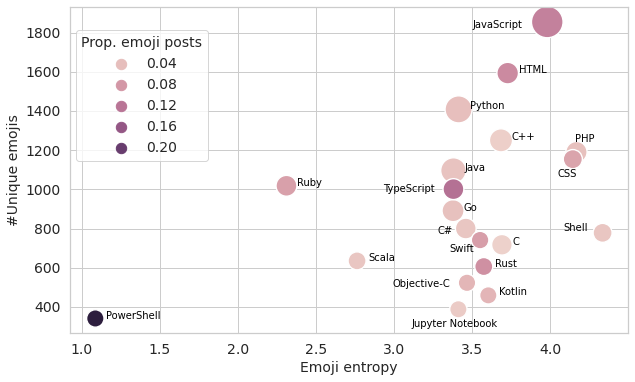

In [32]:
sns.set(style = "whitegrid")
plt.subplots(figsize=(10, 6))
plot_repos = []
plot_types = []
plot_entropy = []
plot_pers = []
for lang in top_20_langs:
    plot_repos.append(lang_repos[lang])
    plot_types.append(lang_emoji_type[lang])
    plot_entropy.append(lang_emoji_entropy[lang])
    plot_pers.append(repo_lang_emojipost_per[lang])
ax = sns.scatterplot(x = plot_entropy, y = plot_types, size = plot_repos, hue = plot_pers, sizes=(300, 1000), legend = 'brief')#, style = plot_repos)

for i in range(0, 20):
    if top_20_langs[i] == 'JavaScript':
        ax.text(plot_entropy[i] - 0.48, plot_types[i] - 30, top_20_langs[i], horizontalalignment='left', size='medium', color='black')
        continue
    if top_20_langs[i] == 'PHP':
        ax.text(plot_entropy[i] - 0.01, plot_types[i] + 50, top_20_langs[i], horizontalalignment='left', size='medium', color='black')
        continue
    if top_20_langs[i] == 'CSS':
        ax.text(plot_entropy[i] - 0.1, plot_types[i] - 90, top_20_langs[i], horizontalalignment='left', size='medium', color='black')
        continue
    if top_20_langs[i] == 'Shell':
        ax.text(plot_entropy[i] - 0.25, plot_types[i] + 10, top_20_langs[i], horizontalalignment='left', size='medium', color='black')
        continue
    if top_20_langs[i] == 'C#':
        ax.text(plot_entropy[i] - 0.18, plot_types[i] - 30, top_20_langs[i], horizontalalignment='left', size='medium', color='black')
        continue
    if top_20_langs[i] == 'Swift':
        ax.text(plot_entropy[i] - 0.2, plot_types[i] - 60, top_20_langs[i], horizontalalignment='left', size='medium', color='black')
        continue
    if top_20_langs[i] == 'Objective-C':
        ax.text(plot_entropy[i] - 0.48, plot_types[i] - 20, top_20_langs[i], horizontalalignment='left', size='medium', color='black')
        continue
    if top_20_langs[i] == 'Jupyter Notebook':
        ax.text(plot_entropy[i] - 0.3, plot_types[i] - 90, top_20_langs[i], horizontalalignment='left', size='medium', color='black')
        continue
    if top_20_langs[i] == 'TypeScript':
        ax.text(plot_entropy[i] - 0.45, plot_types[i] - 15, top_20_langs[i], horizontalalignment='left', size='medium', color='black')
        continue
    ax.text(plot_entropy[i] + 0.07, plot_types[i], top_20_langs[i], horizontalalignment='left', size='medium', color='black')#, weight='semibold'

handles, labels = ax.get_legend_handles_labels()
print('handles:')
print(handles)
print('labels:')
print(labels)
handles = handles[:5]
labels = labels[:5]
for h in handles:
    sizes = [s * 3 for s in h.get_sizes()]
    h.set_sizes(sizes)
ax.legend(handles, labels, bbox_to_anchor=(0.26, 0.95), title='Prop. emoji posts', fontsize = 14, title_fontsize = 14)

ax.set_xticklabels(ax.get_xticks(), size = 14)
yticks = [int(i) for i in ax.get_yticks()]
ax.set_yticklabels(yticks, size = 14)

plt.xlabel('Emoji entropy', fontsize = 14)
plt.ylabel('#Unique emojis', fontsize = 14)
# plt.axvline(x = total_emoji_entropy, color = 'r', linestyle = '--')
plt.savefig('../visualization/' + 'emoji_langs.png', dpi = 300)

# 2. Regression

In [33]:
feature_file = data_dir + '2018_emoji_and_non_emoji_user_features'
df1 = pd.read_csv(feature_file + '_p1', sep = '\t', header = 0)
df2 = pd.read_csv(feature_file + '_p2', sep = '\t', header = 0)
df3 = pd.read_csv(feature_file + '_p3', sep = '\t', header = 0)
df = pd.concat([df1, df2, df3])
df

,actor_id,all_events,PullRequestProp,IssuesProp,CommentProp,PushProp,all_events_trend,working_days,working_days_trend,avg_hours_daily,...,C,CSS,PowerShell,Shell,Swift,Objective-C,GCC Machine Description,Jupyter Notebook,Rust,Scala
0,8227320,155,0.096774,0.116129,0.174194,0.335484,-1,63,-1,1.412698,...,0,0,0,0,0,0,0,0,0,0
1,823643,11,0.090909,0.000000,0.363636,0.272727,-1,6,-1,1.333333,...,0,0,0,0,0,0,0,0,0,0
2,5576409,832,0.043269,0.176683,0.191106,0.407452,-1,138,-1,2.231884,...,0,0,0,0,0,0,0,0,0,0
3,11144180,349,0.163324,0.051576,0.077364,0.398281,-1,121,-1,1.537190,...,0,0,0,0,0,0,0,0,0,0
4,2230599,5970,0.128308,0.096315,0.509380,0.290955,-1,332,-1,5.554217,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264803,28447962,3,0.000000,0.666667,0.333333,0.000000,1,2,1,1.500000,...,0,0,0,0,0,0,0,0,0,0
264804,39308976,3,0.333333,0.000000,0.000000,0.333333,-1,2,-1,1.000000,...,0,0,0,0,0,0,0,0,0,0
264805,35534216,9,0.222222,0.000000,0.000000,0.222222,-1,1,-1,2.000000,...,0,0,0,0,0,0,0,0,0,0
264806,514738,11,0.000000,0.000000,0.272727,0.363636,1,4,1,1.000000,...,0,0,0,0,0,0,0,0,0,0


In [34]:
df = df.rename(columns={"C++": "Cpp", "C#": "C_Sharp", 'Objective-C': 'Objective_C', 'GCC Machine Description': 'GCC', 'Jupyter Notebook': 'Jupyter_Notebook'})

In [35]:
df['posts'] = df.issues + df.issues_comment + df.pull + df.pull_comment + df.commit_comment + df.pull_review_comment

df['issues_per'] = df['issues'] / df['posts']
df['pull_per'] = df['pull'] / df['posts']
df['issues_comment_per'] = df['issues_comment'] / df['posts']
df['pull_comment_per'] = df['pull_comment'] / df['posts']
df['commit_comment_per'] = df['commit_comment'] / df['posts']
df['pull_review_comment_per'] = df['pull_review_comment'] / df['posts']

df['all_events_log'] = np.log(df['all_events'] + 1)
df['n_seg_log'] = np.log(df['n_seg'] + 1)
df['n_seg_multi_log'] = np.log(df['n_seg_multi'] + 1)
df['posts_log'] = np.log(df['posts'] + 1)
df['working_days_log'] = np.log(df['working_days'] + 1)
df['platform_age_log'] = np.log(df['platform_age'] + 1)
df['emoji_post_log'] = np.log(df['emoji_posts'] + 1)
df['emoji_post_prop'] = df['emoji_posts'] / df['posts']

In [36]:
productivity = ['all_events_log', 'working_days_log', 'avg_hours_daily', 'avg_seg_hour', 'n_seg_log', 
                'n_seg_multi_log', 'posts_log', 'gap1', 'gap2', 'gap4', 'gap8', 'gap16', 'gap32', 'gap64', 'gap128', 'gap256']
trends_of_productivity = ['all_events_trend', 'working_days_trend', 'avg_hours_daily_trend', 'avg_seg_trend', 
                          'n_seg_trend', 'n_seg_multi_trend', 'post_trend',]
type_of_work = ['PullRequestProp', 'IssuesProp', 'CommentProp', 'PushProp', 'PullRequestDayProp', 'IssuesDayProp', 
                'CommentDayProp', 'PushDayProp', 'PullRequestSegProp', 'IssuesSegProp', 'CommentSegProp', 'PushSegProp',]
type_of_communication = ['issues_per', 'pull_per', 'issues_comment_per', 'pull_comment_per', 'commit_comment_per', 'pull_review_comment_per']
time_management = ['weekday_entropy', 'hours_entropy']

column_names = list(df.columns)
background = ['platform_age_log'] + column_names[45:65]
feature_sets = [productivity, trends_of_productivity, type_of_work, type_of_communication, time_management, background]


In [37]:
all_feature = productivity + trends_of_productivity + type_of_work + type_of_communication + time_management + background
len(all_feature)

64

## 2.1 Outcome variable: emoji posts

In [38]:
# the general VIF process: feature selection
# http://rstudio-pubs-static.s3.amazonaws.com/19354_8a4bf0895a5a4ecba74c55817b68f0a5.html
feature_columns = []
for feature_set in feature_sets:
    feature_columns += feature_set

def copy_list(alist):
    blist = []
    for i in alist:
        blist.append(i)
    return blist
    
drop = True
YY = 'emoji_post_prop'
# YY = 'emoji_post_log'
while drop:
    df1 = df[feature_columns + [YY]]
    features = "+".join(feature_columns)

    # get y and X dataframes based on this regression:
    y, X = dmatrices(YY + ' ~' + features, df1, return_type='dataframe')    
    vif_list = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    
    vif = pd.DataFrame()
    columns_list = X.columns
    vif["VIF Factor"] = vif_list
    vif["features"] = columns_list
    print(vif.round(1))
    
    vif_max = float(max(vif_list))
    
    if vif_max > 5.0:
        feature_to_remove = columns_list[vif_list.index(vif_max)]
        if feature_to_remove == 'Intercept':           
            vif_list_2 = copy_list(vif_list)
            vif_list_2.remove(vif_max)
            vif_max = float(max(vif_list_2))
            if vif_max <= 5.0:
                drop = False
            else:
                feature_to_remove = columns_list[vif_list.index(vif_max)]
    
    else:
        drop = False
    
    if drop:
        print(feature_to_remove)
        print(vif_max)
        feature_columns.remove(feature_to_remove)

/home/panda/anaconda3/envs/699/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1752: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/home/panda/anaconda3/envs/699/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


    VIF Factor          features
0          0.0         Intercept
1         57.0    all_events_log
2        344.9  working_days_log
3          6.3   avg_hours_daily
4          1.4      avg_seg_hour
..         ...               ...
60         1.0       Objective_C
61         1.0               GCC
62         1.0  Jupyter_Notebook
63         1.0              Rust
64         1.0             Scala

[65 rows x 2 columns]
issues_per
inf


In [ ]:
y = df[YY]
feature_columns_for_use = feature_columns
selected_features = []
results = []
for feature_set in feature_sets:
    selected_features += list(set(feature_set) & set(feature_columns_for_use))
    df_chosen = df[selected_features]
    X = df_chosen
    X2 = sm.add_constant(X)
    model = sm.OLS(y, X2)
    result = model.fit()
    print(result.summary())
    results.append(result)

dfoutput = summary_col(results, stars = True)
print(dfoutput)

In [ ]:
print(dfoutput.as_latex())

## 2.2 Outcome variable: prop. emotional emojis

In [ ]:
df_emoji = df.loc[df.emoji_posts > 0]
df_ee = pd.read_csv(data_dir + '2018_emoji_user_emotional_emoji', sep = '\t', header = 0)
df_emoji_ee = df_emoji.join(df_ee.set_index('actor_id'), on = 'actor_id')

In [ ]:
feature_columns = []
for feature_set in feature_sets:
    feature_columns += feature_set

def copy_list(alist):
    blist = []
    for i in alist:
        blist.append(i)
    return blist
    
drop = True
YY = 'prop_emotional_emoji'
while drop:
    df1 = df_emoji_ee[feature_columns + [YY]]
    features = "+".join(feature_columns)

    # get y and X dataframes based on this regression:
    y, X = dmatrices(YY + ' ~' + features, df1, return_type='dataframe')    
    vif_list = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    
    vif = pd.DataFrame()
    columns_list = X.columns
    vif["VIF Factor"] = vif_list
    vif["features"] = columns_list
    print(vif.round(1))
    
    vif_max = float(max(vif_list))
    
    if vif_max > 5.0:
        feature_to_remove = columns_list[vif_list.index(vif_max)]
        if feature_to_remove == 'Intercept':           
            vif_list_2 = copy_list(vif_list)
            vif_list_2.remove(vif_max)
            vif_max = float(max(vif_list_2))
            if vif_max <= 5.0:
                drop = False
            else:
                feature_to_remove = columns_list[vif_list.index(vif_max)]
    
    else:
        drop = False
    
    if drop:
        print(feature_to_remove)
        print(vif_max)
        feature_columns.remove(feature_to_remove)

In [ ]:
# after VIF in general
y = df_emoji_ee[YY]
feature_columns_for_use = feature_columns
selected_features = []
results = []
for feature_set in feature_sets:
    selected_features += list(set(feature_set) & set(feature_columns_for_use))
    df_chosen = df_emoji_ee[selected_features]
    X = df_chosen
    X2 = sm.add_constant(X)
    model = sm.OLS(y, X2)
    result = model.fit()
    print(result.summary())
    results.append(result)

dfoutput = summary_col(results, stars = True)
print(dfoutput)

In [ ]:
print(dfoutput.as_latex())

# 3. Prediction

## 3.1 Model training

In [ ]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score, roc_auc_score

import sys

In [ ]:
models = {'SVM1': [SVC(), {'kernel': ['rbf'], 'C': [0.1, 1, 10, 20]}],
          'GBDT': [GradientBoostingClassifier(), {'learning_rate': [0.05, 0.1, 0.2], 'n_estimators': [140], 'max_depth': range(3, 10, 2), 'max_features': ['sqrt']}],
          'logistic': [LogisticRegression(), {'penalty': ['l2'],'C':[0.01, 0.1, 1, 10, 20, 50, 100], 'max_iter': [1000]}],
          'MLP': [MLPClassifier(), {'hidden_layer_sizes': [(10,30,10),(20,)], 'activation': ['tanh', 'relu'], 'solver': ['sgd', 'adam'], 'alpha': [0.0001, 0.05], 'learning_rate': ['constant','adaptive'], 'max_iter': [1000]}]
         }

In [ ]:
def train_model(df_ds, selected_columns):
    X = df_ds[selected_columns]
    y = df_ds['dropout']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
   
    model_accuracies = {}
    model_aucs = {}
    model_best_params = {}
    model_pred_probs = {}
    for model_name in models:
        clf = models[model_name][0]
        grid_values = models[model_name][1]

        grid_clf_acc = GridSearchCV(clf, param_grid = grid_values, scoring = 'accuracy', cv = 5)
        grid_clf_acc.fit(X_train_scaled, y_train)

        y_pred_acc = grid_clf_acc.predict(X_test_scaled)

        accuracy = accuracy_score(y_test, y_pred_acc)
        model_accuracies[model_name] = accuracy
        
        if model_name == 'SVM1':
            y_pred_prob = grid_clf_acc.decision_function(X_test_scaled)
        else:
            y_pred_prob = grid_clf_acc.predict_proba(X_test_scaled)[:, 1]
        model_pred_probs[model_name] = list(y_pred_prob)
        auc = roc_auc_score(y_test, y_pred_prob)
        model_aucs[model_name] = auc
        
        best_params = grid_clf_acc.best_params_
        model_best_params[model_name] = best_params

        model_pred_probs['gt'] = list(y_test) #ground truth
    return model_accuracies, model_aucs, model_best_params, model_pred_probs

In [ ]:
input_dir = data_dir + 'prediction_input/'
output_dir = data_dir + 'prediction_output/'
measure_activity_levels = {'hour': [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                          'day': [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]}

In [ ]:
for measure in measure_activity_levels:
    activity_levels = measure_activity_levels[measure]

    fout_accuracy = open(output_dir + measure + '_accuracies', 'a', buffering = 1)
    fout_auc = open(output_dir + measure + '_auc', 'a', buffering = 1)
    fout_param = open(output_dir + measure + '_param', 'a', buffering = 1)
    fout_pred = open(output_dir + measure + '_pred', 'a', buffering = 1)
    for level in activity_levels:
        print(level)
        for i in range(0, 30):
            print(i)
            df_ds = pd.read_csv(input_dir + measure + '_dropout_' + str(level) + '_' + str(i), dtype = {"lang": "string"}, sep = '\t', header = 0)
            cs = list(df_ds.columns)
            selected_columns = cs[1:-1]
            model_accuracies, model_aucs, model_best_params, model_pred_probs = train_model(df_ds, selected_columns)
            fout_accuracy.write(str(level) + '\t' + str(i) + '\t' + json.dumps(model_accuracies) + '\n')
            fout_auc.write(str(level) + '\t' + str(i) + '\t' + json.dumps(model_aucs) + '\n')
            fout_param.write(str(level) + '\t' + str(i) + '\t' + json.dumps(model_best_params) + '\n')
            fout_pred.write(str(level) + '\t' + str(i) + '\t' + json.dumps(model_pred_probs) + '\n')

    fout_accuracy.close()
    fout_auc.close()
    fout_param.close()
    fout_pred.close()

## 3.2 Model performance

In [ ]:
from matplotlib.ticker import FormatStrFormatter

In [ ]:
sns.set(style = "ticks")

In [ ]:
def get_prediction_results(measure):
    level_model_accuracies = {}
    accuracy_file = output_dir + measure + '_accuracies'
    fin = open(accuracy_file, 'r')
    for eachLine in fin:
        words = eachLine.strip().split('\t')
        level = float(words[0])
        if level not in level_model_accuracies:
            level_model_accuracies[level] = {}
        i = int(words[1]) #dataset index
        if i not in level_model_accuracies[level]:
            level_model_accuracies[level][i] = {}
        model_accuracies = json.loads(words[2])
        for key in model_accuracies:
            level_model_accuracies[level][i][key] = model_accuracies[key]
    fin.close()
    
    level_model_auc = {}
    auc_file = output_dir + measure + '_auc'
    fin = open(auc_file, 'r')
    for eachLine in fin:
        words = eachLine.strip().split('\t')
        level = float(words[0])
        if level not in level_model_auc:
            level_model_auc[level] = {}
        i = int(words[1])
        if i not in level_model_auc[level]:
            level_model_auc[level][i] = {}
        model_auc = json.loads(words[2])
        for key in model_auc:
            level_model_auc[level][i][key] = model_auc[key]
    fin.close()
    return level_model_accuracies, level_model_auc

In [ ]:
mds = {'GBDT': 'GBDT', 'logistic': 'Logistic', 'SVM1': 'SVM', 'MLP': 'MLP'}

### 3.2.1 Prediction results by avg. daily working hours

In [ ]:
hour_accuracies, hour_auc = get_prediction_results('hour')

levels = []
accs = []
aucs = []
models = []

for level in measure_activity_levels['hour']:
    for i in range(0, 30):
        accuracies = hour_accuracies[level][i]
        auc = hour_auc[level][i]
        for model in mds:
            levels.append(int(level * 100))
            accs.append(accuracies[model])
            aucs.append(auc[model])
            models.append(mds[model])

df_hour = pd.DataFrame({'level': levels, 'accuracy': accs, 'auc': aucs, 'Model': models})

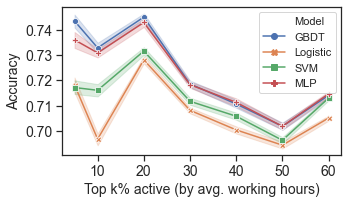

In [ ]:
plt.figure(figsize = (5, 3))
ax = sns.lineplot(
    data = df_hour,
    x = "level", y = "accuracy", hue = "Model", style = "Model",
    markers = True, dashes = False, ci = 95
)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

x_label = 'Top k% active (by avg. working hours)'
y_label = 'Accuracy'
plt.xlabel(x_label, fontsize = 14)
plt.ylabel(y_label, fontsize = 14)

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.tight_layout()
plt.savefig('../visualization/hour_accuracy.png', dpi = 300)

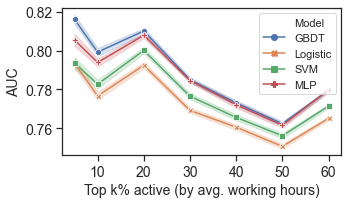

In [ ]:
plt.figure(figsize = (5, 3))
ax = sns.lineplot(
    data = df_hour,
    x = "level", y = "auc", hue = "Model", style = "Model",
    markers = True, dashes = False, ci = 95
)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
x_label = 'Top k% active (by avg. working hours)'
y_label = 'AUC'
plt.xlabel(x_label, fontsize = 14)
plt.ylabel(y_label, fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.tight_layout()
plt.savefig('../visualization/hour_auc.png', dpi = 300)

In [ ]:
df1 = df_hour.loc[(df_hour['level'] == 5)] 

models = list(mds.values())
for model_name in models:
    df2 = df1.loc[df1['Model'] == model_name]
    print(model_name + ':')
    print('mean accuracy:\t' + str("%.3f" % np.mean(df2.accuracy)))
    print('mean auc:\t' + str("%.3f" % np.mean(df2.auc)))

GBDT:
mean accuracy:	0.743
mean auc:	0.816
Logistic:
mean accuracy:	0.718
mean auc:	0.793
SVM:
mean accuracy:	0.717
mean auc:	0.794
MLP:
mean accuracy:	0.736
mean auc:	0.805


### 3.2.2. Prediction results by #working days

In [ ]:
day_accuracies, day_auc = get_prediction_results('day')

levels = []
accs = []
aucs = []
models = []

for level in measure_activity_levels['hour']:
    for i in range(0, 30):
        accuracies = day_accuracies[level][i]
        auc = day_auc[level][i]
        for model in mds:
            levels.append(int(level * 100))
            accs.append(accuracies[model])
            aucs.append(auc[model])
            models.append(mds[model])

df_day = pd.DataFrame({'level': levels, 'accuracy': accs, 'auc': aucs, 'Model': models})

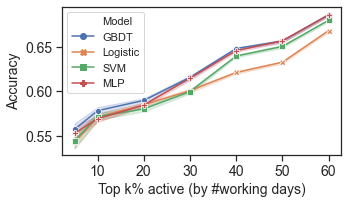

In [ ]:
plt.figure(figsize = (5, 3))
ax = sns.lineplot(
    data = df_day,
    x = "level", y = "accuracy", hue = "Model", style = "Model",
    markers = True, dashes = False, ci = 95
)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

x_label = 'Top k% active (by #working days)'
y_label = 'Accuracy'
plt.xlabel(x_label, fontsize = 14)
plt.ylabel(y_label, fontsize = 14)

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.tight_layout()
plt.savefig('../visualization/day_accuracy.png', dpi = 300)

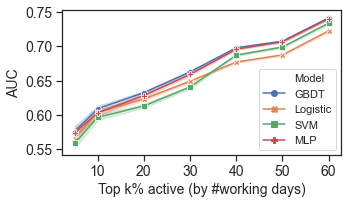

In [ ]:
plt.figure(figsize = (5, 3))
ax = sns.lineplot(
    data = df_day,
    x = "level", y = "auc", hue = "Model", style = "Model",
    markers = True, dashes = False, ci = 95
)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
x_label = 'Top k% active (by #working days)'
y_label = 'AUC'
plt.xlabel(x_label, fontsize = 14)
plt.ylabel(y_label, fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.tight_layout()
plt.savefig('../visualization/day_auc.png', dpi = 300)

#### 3.2.2.1 Precision and recall curve
(presented in S4)

In [ ]:
from sklearn.metrics import precision_recall_curve

In [ ]:
# read y_test and y_pred
infile = output_dir + 'day_pred'
fin = open(infile, 'r')
level_idx_model_prob = {}
level_idx_gt_prob = {}
for eachLine in fin:
    words = eachLine.strip().split('\t')
    level = float(words[0])
    if level not in level_idx_model_prob:
        level_idx_model_prob[level] = {}
        level_idx_gt_prob[level] = {}
    i = int(words[1])
    if i not in level_idx_model_prob[level]:
        level_idx_model_prob[level][i] = {}
        level_idx_gt_prob[level][i] = {}
    model_pred_probs = json.loads(words[2])
    level_idx_model_prob[level][i]['GBDT'] = model_pred_probs['GBDT']
    level_idx_gt_prob[level][i]['GBDT'] = model_pred_probs['gt']
fin.close()

In [ ]:
level = 0.05
precision_all = []
recall_all = []
for idx in range(0, 30):
    y_true = np.array(level_idx_gt_prob[level][idx]['GBDT'])
    y_scores = np.array(level_idx_model_prob[level][idx]['GBDT'])
    precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
    precision_all += list(precision)
    recall_all += list(recall)

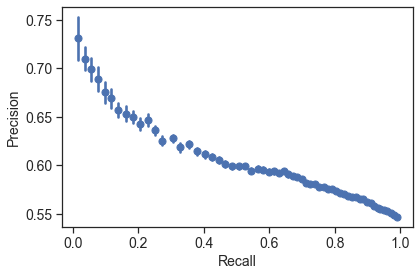

In [ ]:
ax = sns.regplot(x = recall_all, y = precision_all, x_bins = 60, fit_reg = False)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
x_label = 'Recall'
y_label = 'Precision'
plt.xlabel(x_label, fontsize = 14)
plt.ylabel(y_label, fontsize = 14)
# plt.ylim(0.5, 0.8)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
# ax.legend(loc = 'best', title = 'Model') 
# plt.show()
# plt.title('Precision-recall curve (all active users)', fontsize = 14)
plt.tight_layout()
plt.savefig('../visualization/day_precision_recall_binned_curve.png', dpi = 300)

## 3.3 Model interpretation

### 3.3.1 Feature importance and coefficients

In [ ]:
measure = 'hour'
activity_level = 0.1
idx = 3

In [ ]:
# read best params
param_file = output_dir + 'hour_param'
fin = open(param_file, 'r')
idx_params = {}
for eachLine in fin:
    words = eachLine.strip().split('\t')
    level = float(words[0])
    if level != activity_level:
        continue
    idx_params[int(words[1])] = json.loads(words[2])
fin.close()

In [ ]:
infile = input_dir + measure + '_dropout_' + str(activity_level) + '_' + str(idx)
df = pd.read_csv(infile, sep = '\t', header = 0, dtype = {"lang": "string"})
cs = list(df.columns)
selected_columns = cs[1:-1]
df_feature = pd.DataFrame({'feature': selected_columns})

X = df[selected_columns]
y = df['dropout']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logistic = LogisticRegression(C = idx_params[idx]['logistic']['C'], 
                          max_iter = idx_params[idx]['logistic']['max_iter'], 
                          penalty = idx_params[idx]['logistic']['penalty'])
logistic.fit(X_train_scaled, y_train)
feature_coefficient = list(logistic.coef_)[0]
df_feature['coef_' + str(idx)] = list(feature_coefficient)

gbdt = GradientBoostingClassifier(learning_rate = idx_params[idx]['GBDT']['learning_rate'],
                              max_depth = idx_params[idx]['GBDT']['max_depth'],
                              max_features = idx_params[idx]['GBDT']['max_features'],
                              n_estimators = idx_params[idx]['GBDT']['n_estimators'])
gbdt.fit(X_train_scaled, y_train)
feature_importance = list(gbdt.feature_importances_)
df_feature['importance_' + str(idx)] = feature_importance

In [ ]:
df_draw = df_feature.rename(columns = {'coef_3': 'coef', 'importance_3': 'importance'})
df_draw = df_draw.sort_values(by = 'importance', ascending=False)
df_draw = df_draw.reset_index(drop = True)
df_draw = df_draw.head(20)
df_draw

,feature,coef,importance
0,emoji_post_prop,2.661533,0.360167
1,emoji_days_log,-2.703828,0.173269
2,emoji_post_log,-0.566256,0.048915
3,prop_emotional_emoji,-0.199074,0.048278
4,emoji_entropy,-0.864852,0.048214
5,all_emojis_log,-0.180173,0.032321
6,emoji_types_log,-0.772280,0.027551
7,e20p,0.031414,0.019895
8,posemo,0.212255,0.019733
9,e54p,-0.329563,0.015941


In [ ]:
feature_name_to_labels = {'emoji_post_prop': 'prop. emoji posts', 'all_emojis_log': '#emojis (log)', 
                          'emoji_entropy': 'entropy of emojis', 'emoji_post_log': '#emoji posts (log)',
                          'emoji_types_log': '#unique emojis (log)', 'emoji_days_log': '#days using emoji (log)',
                          'posemo': 'score of positive emotion', 'sad': 'score of sadness', 'anx': 'score of anxiety',
                          'negemo': 'score of negative emotion', 'anger': 'score of anger', 
                          'emoji_d': 'score of depression', 'prop_emotional_emoji': 'prop. emotional emojis'}
def get_feature_label(name):
    if name in feature_name_to_labels:
        return feature_name_to_labels[name]
    else:
        if name[0] == 'e':
            return '%'
        else:
            return name

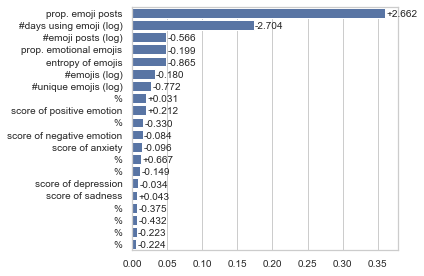

In [ ]:
plt.figure(figsize = (6, 4))
feature_labels = []
feature_names = df_draw.feature.values.tolist()
for name in feature_names:
    feature_labels.append(get_feature_label(name))
ims = df_draw['importance'].values.tolist()
colors = [1 if c >= 0 else 0 for c in ims]
ax = sns.barplot(x = "importance", y = "feature", data = df_draw, hue = colors, palette=sns.color_palette(), dodge=False)

# annotating the bars with coefficient begins
i = 0
coefs = df_draw['coef'].values.tolist()
for p in ax.patches:
    coef = coefs[i]
    i += 1
    if coef < 0:
        ax.annotate("%.3f" % coef, xy=(p.get_width()-0.005, p.get_y()+p.get_height()/2 + 0.1),
                xytext=(5, 0), textcoords='offset points', ha="left", va="center", fontsize = 10)
    else:
        ax.annotate("+" + "%.3f" % coef, xy=(p.get_width()-0.005, p.get_y()+p.get_height()/2 + 0.1),
                xytext=(5, 0), textcoords='offset points', ha="left", va="center", fontsize = 10)
# annotating the bars with coefficient ends
        
ax.set_yticklabels(labels = feature_labels, size = 10)#, rotation = 60
xticks = ["%.2f" % x for x in ax.get_xticks()]
ax.set_xticklabels(xticks, size = 10)
# ax.set_xticklabels(ax.get_xticks(), size = 10)
# ax.yaxis.tick_right()
# plt.gca().invert_yaxis()
ax.get_legend().remove()
# plt.xlim(0, 0.6)
plt.ylabel('')
plt.xlabel('')
# plt.xlabel('Importance', fontsize = 10)
plt.tight_layout()
plt.savefig('../visualization/avg_hours_daily_feature.pdf', dpi = 300)

### 3.3.2 Correlations between features and dropouts

In [ ]:
df_active_emoji = pd.read_csv(data_dir + 'active_emoji_users_0.1', sep = '\t', header = 0)

In [ ]:
df_active_non_emoji = pd.read_csv(data_dir + 'active_non_emoji_users_0.1', sep = '\t',  header = 0)

df_active_non_emoji['emoji_post_log'] = 0
df_active_non_emoji['emoji_post_prop'] = 0
df_active_non_emoji['emoji_entropy'] = 0
df_active_non_emoji['anger'] = 0

In [ ]:
sns.set(style = "whitegrid")
xname_label = {'emoji_post_log': '#Emoji posts (log)', 'emoji_post_prop': 'Prop. emoji posts',
               'anger': 'Score of angry emotion from emojis',
              'emoji_entropy': 'Entropy of emojis', 'posemo': 'Score of positive emotion from emojis',
              'emoji_d': 'Score of depression from emojis', 'e54p': 'Emoji: party popper',
              'anx': 'Score of anxiety from emojis', 'emoji_days_log': '#Days using emoji',
              'negemo': 'Score of negative emotion from emojis', 'e20p': 'Emoji: thumbs up',
              'e63p': 'Emoji: waving hand'}

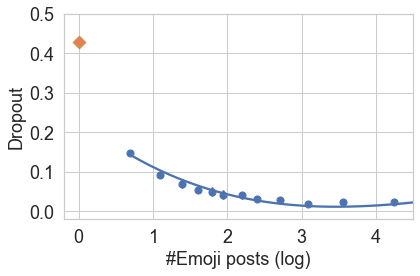

In [ ]:
xname = 'emoji_post_log'
x_label = xname_label[xname]

yname = 'dropout'
y_label = 'Dropout'

ax = sns.regplot(x = xname, y = yname, data = df_active_emoji, order = 3, fit_reg = True, x_bins = 20)#
ax2 = sns.regplot(x = xname, y = yname, data = df_active_non_emoji, fit_reg = False, x_bins = 10, marker=u'D', scatter_kws={'s':80})#
plt.xlim(-0.2, 4.5)
plt.ylim(-0.02, 0.5)
plt.xlabel(x_label, fontsize = 18)
plt.ylabel(y_label, fontsize = 18)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.tight_layout()
plt.savefig('../visualization/' + xname + '_vs_' + yname + '.png', dpi = 300)

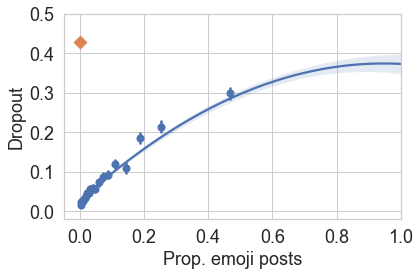

In [ ]:
xname = 'emoji_post_prop'
x_label = xname_label[xname]

ax = sns.regplot(x = xname, y = yname, data = df_active_emoji, order = 2, fit_reg = True, x_bins = 20)#
ax2 = sns.regplot(x = xname, y = yname, data = df_active_non_emoji, fit_reg = False, x_bins = 10, marker=u'D', scatter_kws={'s':80})#
plt.ylim(-0.02, 0.5)
plt.xlabel(x_label, fontsize = 18)
plt.ylabel(y_label, fontsize = 18)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.tight_layout()
plt.savefig('../visualization/' + xname + '_vs_' + yname + '.png', dpi = 300)

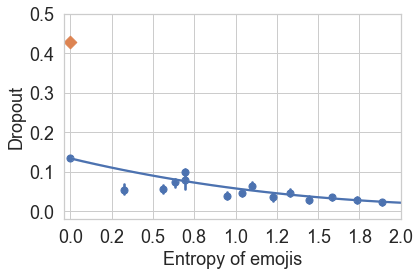

In [ ]:
xname = 'emoji_entropy'
x_label = xname_label[xname]

yname = 'dropout'
y_label = 'Dropout'

ax = sns.regplot(x = xname, y = yname, data = df_active_emoji, order = 3, fit_reg = True, x_bins = 30)#
ax2 = sns.regplot(x = xname, y = yname, data = df_active_non_emoji, fit_reg = False, x_bins = 10, marker=u'D', scatter_kws={'s':80})#
plt.xlim(-0.04, 2)
plt.ylim(-0.02, 0.5)
plt.xlabel(x_label, fontsize = 18)
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.ylabel(y_label, fontsize = 18)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.tight_layout()
plt.savefig('../visualization/' + xname + '_vs_' + yname + '.png', dpi = 300)

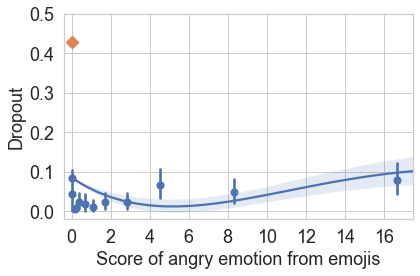

In [ ]:
xname = 'anger'
x_label = xname_label[xname]

yname = 'dropout'
y_label = 'Dropout'

ax = sns.regplot(x = xname, y = yname, data = df_active_emoji, order = 5, fit_reg = True, x_bins = 400)#
ax2 = sns.regplot(x = xname, y = yname, data = df_active_non_emoji, fit_reg = False, x_bins = 10, marker=u'D', scatter_kws={'s':80})#
plt.xlim(-0.4, 17.5)
plt.ylim(-0.02, 0.5)
plt.xlabel(x_label, fontsize = 18)
plt.ylabel(y_label, fontsize = 18)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.tight_layout()
plt.savefig('../visualization/' + xname + '_vs_' + yname + '.png', dpi = 300)

### 3.3.3 Dropout ratio vs. programming languages
(presented in S5)

In [ ]:
df_lang = pd.read_csv(data_dir + 'lang_emoji_dropout', sep = '\t', header = 0)
df_lang

,idx,lang,dropout,dropout_in_emoji,dropout_in_non_emoji
0,0,JavaScript,0.411352,0.102581,0.437118
1,1,Python,0.417603,0.105775,0.435947
2,2,Java,0.422875,0.129118,0.434839
3,3,C++,0.494670,0.117690,0.512313
4,4,Go,0.336352,0.068713,0.365958
5,5,HTML,0.430102,0.148910,0.447343
6,6,PHP,0.411044,0.111136,0.432735
7,7,Ruby,0.359160,0.106063,0.396035
8,8,TypeScript,0.368674,0.087882,0.399523
9,9,C#,0.446148,0.150743,0.463463


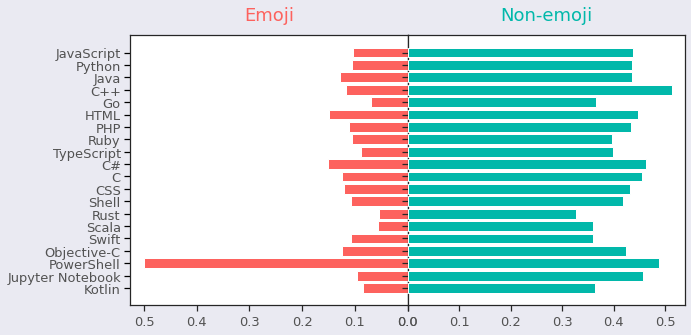

In [ ]:
font_color = '#525252'
hfont = {'fontname':'Calibri'}
facecolor = '#eaeaf2'
color_red = '#fd625e'
color_blue = '#01b8aa'
index = df_lang.index
column0 = df_lang['dropout_in_emoji']
column1 = df_lang['dropout_in_non_emoji']
title0 = 'Emoji'
title1 = 'Non-emoji'

fig, axes = plt.subplots(figsize=(10,5), facecolor=facecolor, ncols=2, sharey=True)
fig.tight_layout()

axes[0].barh(index, column0, align='center', color=color_red, zorder=10)
axes[0].set_title(title0, fontsize=18, pad=15, color=color_red, **hfont)
axes[1].barh(index, column1, align='center', color=color_blue, zorder=10)
axes[1].set_title(title1, fontsize=18, pad=15, color=color_blue, **hfont)

# If you have positive numbers and want to invert the x-axis of the left plot
axes[0].invert_xaxis() 

# To show data from highest to lowest
plt.gca().invert_yaxis()

axes[0].set(yticks=df_lang.index, yticklabels=df_lang.lang)
axes[0].yaxis.tick_left()
axes[0].tick_params(axis='y', colors='black') # tick color

# axes[1].set_xticklabels([1000, 2000, 3000, 4000, 5000, 6000, 7000])

for label in (axes[0].get_xticklabels() + axes[0].get_yticklabels()):
    label.set(fontsize=13, color=font_color, **hfont)
for label in (axes[1].get_xticklabels() + axes[1].get_yticklabels()):
    label.set(fontsize=13, color=font_color, **hfont)

plt.subplots_adjust(wspace=0, top=0.85, bottom=0.1, left=0.18, right=0.95)

plt.savefig('../visualization/lang_emoji_dropout.png', facecolor = facecolor, dpi = 300)